In [ ]:
#@title imports
import numpy as np
import matplotlib.pyplot as plt

Tenemos que encontrar raices de la siguiente función:
$f(x)=x^{3}+4x^{2}-2$
es decir buscamos $x$'s tales que $f(x)=0$, sin embargo, necesitamos una función para hacer iteración de punto fijo, osea, una función del tipo $g(x)=x$, por lo que tenemos que adaptar la función original:



*   Opción 1:

    $f(x)=x^{3}+4x^{2}-2=0$

    $x^{2}(x+4)=2$

    $(x+4)=\frac{2}{x^{2}}$

    $g(x)=x=\frac{2}{x^{2}}-4$

*   Opción 2:

    $f(x)=x^{3}+4x^{2}-2=0$

    $4x^{2}-2=-x^{3}$

    $g(x)=\frac{2-4x^{2}}{x^{2}}=x$

*   Opción 3:

    $f(x)=x^{3}+4x^{2}-2=0$

    $x^{3}-2=-4x^{2}$

    $g(x)=\frac{2-x^{3}}{4x}=x$

*   Opcion 4:

    $f(x)=x^{3}+4x^{2}-2=0$

    $2-x^{3}=4x^{2}$

    $\frac{2-x^{3}}{4}=x^{2}$

    $\frac{\sqrt{2-x^{3}}}{2}=x$

debemos buscar en el intervalo $[0,2]$ pero sería positivo primero visualizar la función.

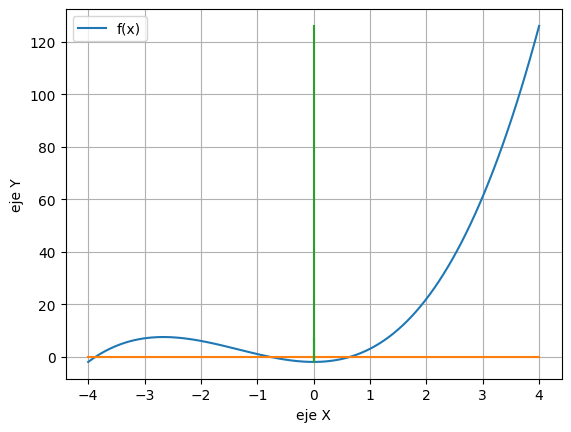

In [ ]:
#@title grafica de f(x)
f = lambda x: np.power(x,3) + 4*np.power(x,2) - 2

x=np.linspace(-4,4,100)
y=f(x)
plt.plot(x,y, label='f(x)')
plt.plot(x,[0]*len(x)) #una recta horizontal fijada en y=0
plt.plot([0]*len(y),y) #una recta vertical fijada en x=0

plt.grid(True)
plt.ylabel('eje Y')
plt.xlabel('eje X')
plt.legend()
plt.show()

In [ ]:
#@title ipf
def ipf(g,r, iters, prints=False):
  for iter in np.arange(iters):
    r=g(r)
    if(prints):
      print(iter, r)
  return r

In [ ]:
g1 = lambda x : 2./np.power(x,2.)-4.
g2 = lambda x : (2.-np.power(x,3.))/(4.*x)
g3 = lambda x : (2.-4.*np.power(x,2.))/np.power(x,2.)
g4 = lambda x : (np.sqrt(2.-np.power(x,3)))/2.

r=1
r=ipf(g4,r,20,prints=True)

0 0.5
1 0.6846531968814576
2 0.647894438539531
3 0.657273756394024
4 0.6549908318531107
5 0.6555532825269603
6 0.6554151179201976
7 0.6554490823887186
8 0.6554407345257488
9 0.6554427863722085
10 0.6554422820481081
11 0.6554424060064439
12 0.6554423755386177
13 0.6554423830273322
14 0.6554423811866744
15 0.6554423816390913
16 0.6554423815278914
17 0.6554423815552233
18 0.6554423815485053
19 0.6554423815501565


In [ ]:
print(r,f(r))

0.6554423815501565 2.1280754936015e-12


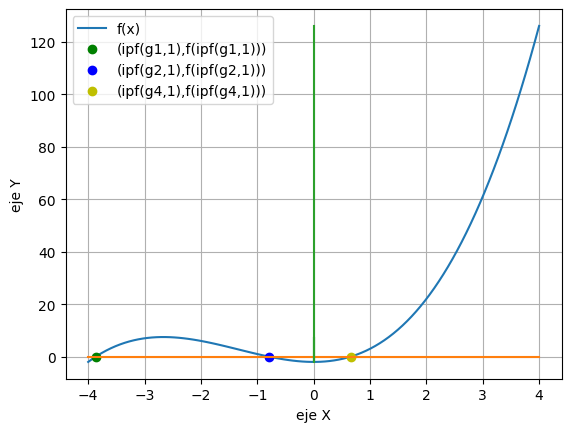

In [ ]:
#@title grafica de la raices encontradas
x=np.linspace(-4,4,100)
y=f(x)

plt.plot(x,y, label='f(x)')

plt.plot(ipf(g1,1,20),f(ipf(g1,1,20)), 'go', label='(ipf(g1,1),f(ipf(g1,1)))')
plt.plot(ipf(g2,1,20),f(ipf(g2,1,20)), 'bo', label='(ipf(g2,1),f(ipf(g2,1)))')
plt.plot(ipf(g4,1,20),f(ipf(g4,1,20)), 'yo', label='(ipf(g4,1),f(ipf(g4,1)))')

#graficando los ejes cartesianos
plt.plot(x,[0]*len(x))
plt.plot([0]*len(y),y)

plt.grid(True)
plt.ylabel('eje Y')
plt.xlabel('eje X')
plt.legend()
plt.show()

In [ ]:
#@title Metodo de newton
def newton(f,fp,r, iters, prints=False):
  for iter in np.arange(iters):
    r=r-f(r)/fp(r)
    if(prints):
      print(iter, r)
  return r

In [ ]:
f = lambda x: np.power(x,3) + 4*np.power(x,2) - 2
fp = lambda x: 3*np.power(x,2) + 8*x

n=15
r=1

r=newton(f,fp, r, n, prints=True)

0 0.7272727272727273
1 0.6596996753246753
2 0.6554588311763728
3 0.6554423817969685
4 0.6554423815498308
5 0.6554423815498308
6 0.6554423815498308
7 0.6554423815498308
8 0.6554423815498308
9 0.6554423815498308
10 0.6554423815498308
11 0.6554423815498308
12 0.6554423815498308
13 0.6554423815498308
14 0.6554423815498308


In [ ]:
print(r,f(r))

0.6554423815498308 0.0


el metodo de newton tiene convergencia **cuadrática**:

$M=\frac{f''(r)}{2f'(r)}$

In [ ]:
#@title tasa convergencia metodo de newton
fpp = lambda x: 6*x + 8
M=fpp(r)/(2*fp(r))
print(f"La convergencia CUADRATICA M es de: {M}")

La convergencia CUADRATICA M es de: 0.9133503598011994


### Estudio de la convergencia lineal IPF


Busqueda: $S=|g'(r)|<0.8$

funcion: $f(x)=x^{3}+4x^{2}-2=0$

$2-x^{3}=4x^{2}$

$\frac{2-x^{3}}{4}=x^{2}$

$g_{4}=\frac{\sqrt{2-x^{3}}}{2}=x$

$g_{4}'(x)=-\frac{3x^{2}}{4 \sqrt{2-x^{3}}}$

Calcular: $|g_{4}'(r)|$

In [ ]:
g4p = lambda x: -(3*np.power(x,2))/(4*np.sqrt(2-np.power(x,3)))
print(f'raiz encontrada con g1 mediante ipf: {ipf(g4,1,20)}')
print(f'convergencia: {abs(g4p(ipf(g4,1,20)))}')

raiz encontrada con g1 mediante ipf: 0.6554423815501565
convergencia: 0.2457908930814609


Busqueda: $S=|g'(r)|<0.8$

$f(x)=x^{3}+4x^{2}-2=0$

$x^{3}-2=-4x^{2}$

$g_{2}(x)=x=\frac{2-x^{3}}{4x}$

$g_{2}'(x)=-\frac{x^{3}+1}{4x}$

Calcular: $|g_{2}'(r)|$

In [ ]:
g2p = lambda x: -(np.power(x,3)+1)/(2*np.power(x,2))
print(f'raiz encontrada con g1 mediante ipf: {ipf(g2,2,20)}')
print(f'convergencia: {abs(g2p(ipf(g2,2,20)))}')

raiz encontrada con g1 mediante ipf: -0.789244120745132
convergencia: 0.40806690640051796



Busqueda: $S=|g'(r)|<0.1$

funcion: $f(x)=x^{3}+4x^{2}-2=0$

$x^{2}(x+4)=2$

$(x+4)=\frac{2}{x^{2}}$

$g_{1}(x)=\frac{2}{x^{2}}-4=x$

$g_{1}'(x)=-\frac{4}{x^{3}}$

Calcular: $|g_{1}'(r)|$

In [ ]:
g1p = lambda x: -4/np.power(x,3)
print(f'raiz encontrada con g1 mediante ipf: {ipf(g1,2,20)}')
print(f'convergencia: {abs(g1p(ipf(g1,2,20)))}')

raiz encontrada con g1 mediante ipf: -3.8661982625090223
convergencia: 0.06921618003322212


La función $g_{3}$ propuesta tiene la misma tasa de convergenciade que una de las funciones ya estudiadas:

$g_{1}(x)=\frac{2}{x^{2}}-4$

$g_{3}(x)=\frac{2-4x^{2}}{x^{2}}$

$g_{1}'(x)=g_{3}'(x)$